<a href="https://colab.research.google.com/github/alexphil12/Energy-forcasting-UDLA/blob/main/model_to_fils_the_holes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [5]:

df = pd.read_csv('/content/df_cov_continu_1_1.txt', index_col=0, parse_dates=True,sep=',')
N1=len(list(df.iloc[:,3]))
df_train=df.iloc[0:round(N1*0.8),:]
df_test=df.iloc[round(N1*0.8):N1,:]

In [7]:
mesure=["Fecha","Hora"];
mesure.append("Voltaje_(R)_[V]")	
mesure.append("Voltaje_(S)_[V]")	
mesure.append("Voltaje_(T)_[V]")	
mesure.append("Voltaje_(RS)_[V]")	
mesure.append("Voltaje_(ST)_[V]")	
mesure.append("Voltaje_(TR)_[V]")	
mesure.append("Corriente_R_[A]")	
mesure.append("Corriente_S_[A]")	
mesure.append("Corriente_T_[A]")	
mesure.append("Potencia_R_[VA]")	
mesure.append("Potencia_S_[VA]")	
mesure.append("Potencia_T_[VA]")	
mesure.append("Potencia_R_[W]")	
mesure.append("Potencia_S_[W]")	
mesure.append("Potencia_T_[W]")	
mesure.append("Potencia_R_[VAR]")	
mesure.append("Potencia_S_[VAR]")	
mesure.append("Potencia_T_[VAR]")	
mesure.append("Corriente_N_[A]")	
mesure.append("Frecuencia_[Hz]")	
mesure.append("not_sure_1")	
mesure.append("not_sure_2")	
mesure.append("not_sure_3")	
mesure.append("Potencia_3F_[KVA]")	
mesure.append("Potencia_3F_[W]")	
mesure.append("Potencia_3F_[VAR]")	
mesure.append("Factor de Potencia")

In [8]:
RSG_train = df_train[mesure[14]].values

In [9]:
RSG_train = np.reshape(RSG_train,(-1,1))

In [10]:
RSG_test = df_test[mesure[14]].values

In [11]:
RSG_test=np.reshape(RSG_test,(-1,1))

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(RSG_train)

MinMaxScaler()

In [15]:
scaled_train = scaler.transform(RSG_train)
scaled_test = scaler.transform(RSG_test)

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
n_input = 10
n_features = 0
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=100)
test_generator=TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=100)

In [18]:
X,y = train_generator[0]

In [19]:

print(f'Predicción: \n {y}')

Predicción: 
 [[0.71087692]
 [0.66896032]
 [0.65003155]
 [0.69668878]
 [0.71945294]
 [0.71450332]
 [0.68547071]
 [0.69974554]
 [0.73367286]
 [0.72013919]
 [0.67706627]
 [0.68677852]
 [0.71158907]
 [0.71819423]
 [0.72875023]
 [0.71728826]
 [0.70490472]
 [0.75152897]
 [0.76300896]
 [0.70552638]
 [0.67246783]
 [0.71139447]
 [0.77183938]
 [0.6718298 ]
 [0.67149913]
 [0.72564544]
 [0.73228382]
 [0.67805992]
 [0.67224842]
 [0.72256594]
 [0.75053521]
 [0.75358412]
 [0.71235958]
 [0.70868207]
 [0.74795719]
 [0.76881384]
 [0.73239726]
 [0.68060735]
 [0.72971337]
 [0.77312241]
 [0.73581636]
 [0.68727855]
 [0.6939264 ]
 [0.69676157]
 [0.72921679]
 [0.70446023]
 [0.6605753 ]
 [0.65168959]
 [0.73501861]
 [0.74217564]
 [0.69949149]
 [0.6771935 ]
 [0.71481906]
 [0.7489231 ]
 [0.73566375]
 [0.71609942]
 [0.72116367]
 [0.74467247]
 [0.78192591]
 [0.76475461]
 [0.71147919]
 [0.71304336]
 [0.75608222]
 [0.75000907]
 [0.680493  ]
 [0.73394443]
 [0.75211118]
 [0.72905151]
 [0.70083115]
 [0.70386218]
 [0.73

In [20]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

In [21]:
from keras.layers.recurrent_v2 import LSTM
# define model
model = Sequential()
model.add(GRU(128, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit_generator(train_generator, epochs=50,validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
82/82 [==============================] - 8s 45ms/step - loss: 0.0391 - val_loss: 0.0035
Epoch 2/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 3/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 7/50
82/82 [==============================] - 2s 21ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/50
82/82 [==============================] - 2s 22ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 11/

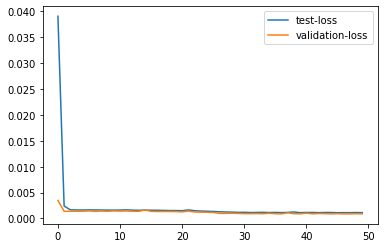

In [24]:
loss_per_epoch = model.history.history['loss']
loss_vall=model.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="test-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()


In [25]:
test_predictions = []
Q=0
N=100
first_eval_batch = scaled_train[Q:Q+n_input]
current_batch = first_eval_batch.reshape((1, n_input, n_features+1))
for i in range(N):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [26]:
true_predictions = scaler.inverse_transform(test_predictions)

In [27]:
L_true=  list(df_train[mesure[14]][n_input+1+Q:n_input+1+Q+N])

In [28]:
L_prediction= list(true_predictions)

In [29]:
model.evaluate_generator(test_generator)
trainPredict = model.predict_generator(train_generator)
testPredict = model.predict_generator(test_generator)
true_pre=scaler.inverse_transform(trainPredict)
true_pre_test=scaler.inverse_transform(testPredict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


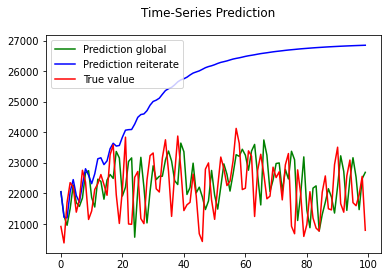

In [30]:
plt.suptitle('Time-Series Prediction')
plt.plot(range(len(L_true)),true_pre[Q:Q+N],label='Prediction global',c="green")
plt.plot(range(len(L_true)),L_prediction,label='Prediction reiterate',c="blue")
plt.plot(range(len(L_true)),L_true,label='True value',c="red")
plt.legend()
plt.show()

In [31]:
Resul_rmse=np.sqrt(mean_squared_error(true_pre_test,RSG_test[n_input:]))
print(Resul_rmse)

849.0914086847671
